In [1]:
import pandas as pd
df = pd.read_csv('Google_Stock_Price.csv',index_col='Date',parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028


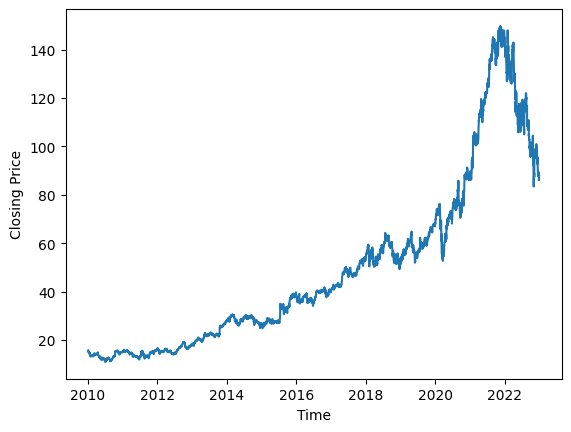

In [2]:
import matplotlib.pyplot as plt
plt.plot(df['Close'])
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.show()

In [3]:
close_prices = df[['Close']].values.reshape(-1,1)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
close_prices = sc.fit_transform(close_prices)

In [8]:
import numpy as np
def cs(data,sq_len):
    x,y=[],[]
    for i in range(sq_len,len(data)):
        x.append(data[i-sq_len:i,0])
        y.append(data[i,0])
    return np.array(x),np.array(y)
sq_len=60
x, y = cs(close_prices,sq_len)
x = x.reshape(x.shape[0],x.shape[1],1)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle=False)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

model = Sequential ([
    Input(shape=(x.shape[1],1)),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mse'
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    patience=2,
    verbose=1,
    restore_best_weights=True
)
history = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs=10,
    callbacks=[early_stopping]
)

Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.1485e-04 - val_loss: 0.0031
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.0752e-04 - val_loss: 0.0023
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9.9753e-05 - val_loss: 0.0036
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9.3014e-05 - val_loss: 0.0018
Epoch 5/10
 9/81 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 9.7569e-05

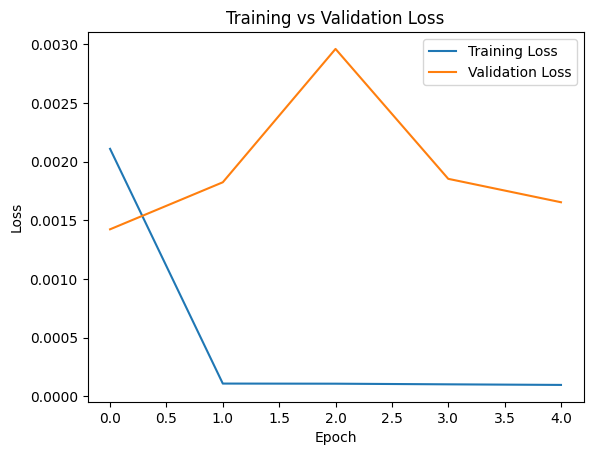

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()